In [19]:
import json
from pprint import pprint
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [2]:
# Import data
with open('ratings.json') as data_file:
    data = json.load(data_file)

In [3]:
print(len(data))

33671


In [4]:
ratings = [eval(elem['ratings']) for elem in data]
reviews = [elem['review_text'] for elem in data]

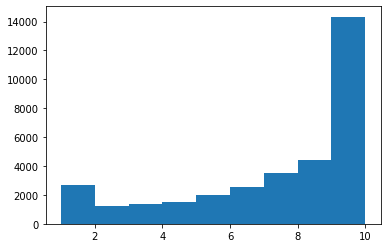

In [5]:
plt.hist(ratings, bins=np.arange(min(ratings), max(ratings) + 1))
plt.show()

In [6]:
df = pd.DataFrame({'rating':ratings, 'review': reviews})
df['type'] = df['rating'].apply(lambda x: 1 if x > 5 else 0) # greater than 5 -> positive, otherwise -> negative

In [7]:
y = np.array(df['type'].tolist())
corpus = df['review'].tolist()

In [91]:
# Creating the Tf-Idf model
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [92]:
print(X.shape)
print(y.shape)

(33671, 2000)
(33671,)


In [103]:
# Splitting the dataset into the Training set and Test set
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
print(text_train.shape)
print(sent_train.shape)
print(text_test.shape)
print(sent_test.shape)

(23569, 2000)
(23569,)
(10102, 2000)
(10102,)


In [105]:
sent_train_nn = sent_train.reshape(sent_train.size, 1)
sent_test_nn = sent_test.reshape(sent_test.size, 1)

In [106]:
print(sent_train_nn.shape)
print(sent_test_nn.shape)

(23569, 1)
(10102, 1)


In [107]:
# Training the classifier
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(text_train,sent_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# Testing model performance
sent_pred = classifier.predict(text_test)
cm = confusion_matrix(sent_test, sent_pred)
accuracy_score(sent_pred, sent_test, normalize=True)

0.7511383884379331

In [109]:
# Using LinearSVC
classifier_linearSVC = LinearSVC(C=0.1)
classifier_linearSVC.fit(text_train, sent_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [110]:
# Testing model performance
sent_pred_LinearSVC = classifier_linearSVC.predict(text_test)
confusion_matrix(sent_test, sent_pred_LinearSVC)
accuracy_score(sent_pred_LinearSVC, sent_test, normalize=True)

0.7532171847158978

In [115]:
batch_size = 32
epochs = 10

In [123]:
model = Sequential()
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    text_train,
    sent_train_nn,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(text_test, sent_test_nn),
)
score = model.evaluate(text_test, sent_test_nn, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train on 23569 samples, validate on 10102 samples
Epoch 1/10
23569/23569 [==============================] - 3s 123us/step - loss: 0.5600 - acc: 0.7390 - val_loss: 0.5376 - val_acc: 0.7416
Epoch 2/10
23569/23569 [==============================] - 2s 74us/step - loss: 0.5287 - acc: 0.7490 - val_loss: 0.5338 - val_acc: 0.7423
Epoch 3/10
23569/23569 [==============================] - 2s 75us/step - loss: 0.5205 - acc: 0.7524 - val_loss: 0.5330 - val_acc: 0.7411
Epoch 4/10
23569/23569 [==============================] - 2s 82us/step - loss: 0.5157 - acc: 0.7564 - val_loss: 0.5333 - val_acc: 0.7427
Epoch 5/10
23569/23569 [==============================] - 2s 77us/step - loss: 0.5093 - acc: 0.7627 - val_loss: 0.5321 - val_acc: 0.7439
Epoch 6/10
23569/23569 [==============================] - 2s 73us/step - loss: 0.5068 - acc: 0.7669 - val_loss: 0.5301 - val_acc: 0.7535
Epoch 7/10
23569/23569 [==============================] - 2s 75us/step - loss: 0.5025 - acc: 0.7698 - val_loss: 0.5304 - val_ac